<a href="https://colab.research.google.com/github/hdfckla/Deepika/blob/main/Crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/crop_yield.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('/content/crop_yield.csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Andra Pradesh,Maize,1990,36613,1485,121.0,16.37
1,1,Andra Pradesh,Potatoes,1990,66667,1485,121.0,16.37
2,2,Andra Pradesh,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Andra Pradesh,Sorghum,1990,12500,1485,121.0,16.37
4,4,Andra Pradesh,Soybeans,1990,7000,1485,121.0,16.37


In [ ]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)

    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())

    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

get_df_info(df)



Shape of DataFrame:  (9477, 8)

Columns in DataFrame:  ['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

Data types of columns:
 Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year      int64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9477 entries, 0 to 9476
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9477 non-null   int64  
 1   Area                           9477 non-null   object 
 2   Item                           9477 non-null   object 
 3   Year            

In [ ]:
# @title Default title text
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Create dropdowns
area_dropdown = widgets.Dropdown(options=df['Area'].unique(), description='Area:')
item_dropdown = widgets.Dropdown(options=df['Item'].unique(), description='Item:')

# Function to plot data
def plot_data(area, item):
    plt.figure(figsize=(10,6))
    temp_df = df[(df['Area'] == area) & (df['Item'] == item)]
    plt.plot(temp_df['Year'], temp_df['hg/ha_yield'])
    plt.title(f'{item} Yield in {area} over the years')
    plt.xlabel('Year')
    plt.ylabel('hg/ha_yield')
    plt.grid(True)
    plt.show()

# Use interactive function to automatically update the plot
widgets.interactive(plot_data, area=area_dropdown, item=item_dropdown)


interactive(children=(Dropdown(description='Area:', options=('Andra Pradesh', 'Arunachal Pradesh', 'Assam', 'B…

In [ ]:
# Create dropdown
area_dropdown = widgets.Dropdown(options=df['Area'].unique(), description='Area:')

# Function to plot data
def plot_data(area):
    plt.figure(figsize=(10,6))
    temp_df = df[df['Area'] == area]
    plt.plot(temp_df['Item'], temp_df['Item'])
    plt.title(f'Pesticides Tonnes over the years in {area}')
    plt.xlabel('Year')
    plt.ylabel('hg/ha_yield')
    plt.grid(True)
    plt.show()
# Use interactive function to automatically update the plot
widgets.interactive(plot_data, area=area_dropdown)


interactive(children=(Dropdown(description='Area:', options=('Andra Pradesh', 'Arunachal Pradesh', 'Assam', 'B…

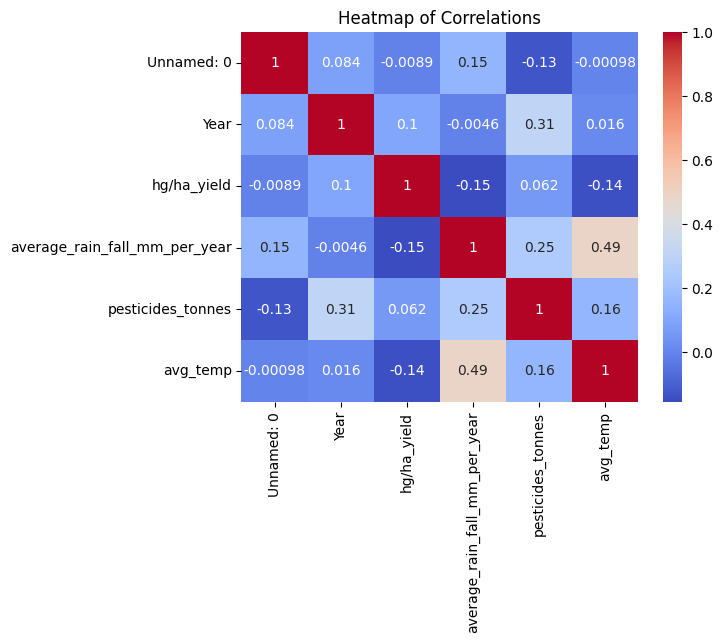

In [ ]:
# Correlation of numeric features
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

In [ ]:
X = df.drop('Year', axis=1)
y = df['hg/ha_yield']

In [ ]:
categorical_features = ['Area', 'Item']
numerical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=101)),
    ('Random Forest', RandomForestRegressor(random_state=101)),
    ('Extra Trees', ExtraTreesRegressor(random_state=101)),
    ('Support Vector Machine', SVR())
]


In [ ]:
for name, model in models:
    # Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}\n')


Linear Regression:
Mean Squared Error: 1795458036.1880846
Mean Absolute Error: 29732.306111174214
R^2 Score: 0.7228862707176944

Decision Tree:
Mean Squared Error: 423971383.78888035
Mean Absolute Error: 10713.80504846161
R^2 Score: 0.9345636105647146

Random Forest:
Mean Squared Error: 423249502.5950609
Mean Absolute Error: 10713.088807053622
R^2 Score: 0.9346750268081946

Extra Trees:
Mean Squared Error: 423971383.78888005
Mean Absolute Error: 10713.80504846161
R^2 Score: 0.9345636105647146

Support Vector Machine:
Mean Squared Error: 7473873993.545084
Mean Absolute Error: 52995.70305104766
R^2 Score: -0.15352910109471085

